In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import librosa
import librosa.display

In [4]:
annots = loadmat('eeg-biometric-competition/Enrollment/epoch000001.mat')
wave = annots['epoch_data']
wave.shape

(65, 1000)

In [8]:
plt.figure(figsize=(15,5))
for i in range(65):
    plt.plot(wave[i])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.savefig('Wavelet.png')
plt.close()

In [9]:
wave = wave.reshape((-1, ))

In [10]:
wave.shape

(65000,)

In [11]:
plt.figure(figsize=(15,5))
plt.plot(wave)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.savefig('Flat_Wavelet.png')
plt.close()

In [4]:
df = pd.read_csv("eeg-biometric-competition/Enrollment_Info.csv")
df.head()

,EpochID,subject,session,condition,usage
0,epoch000001,sub001,1,12,1
1,epoch000002,sub001,1,10,1
2,epoch000003,sub001,1,13,1
3,epoch000004,sub001,1,1,1
4,epoch000005,sub001,1,7,1


In [13]:
subs = {}
for i in df['subject']:
    if i in ['sub018', 'sub019', 'sub020']:
        subs[i] = []

In [14]:
subs.keys()

dict_keys(['sub018', 'sub019', 'sub020'])

In [15]:
for i, j in zip(df['EpochID'], df['subject']):
    if j in ['sub018', 'sub019', 'sub020']:
        subs[j].append(i)

In [16]:
for subid in subs.keys():
    for epochid in subs[subid]:
        annots = loadmat('eeg-biometric-competition/Enrollment/'+epochid+'.mat')
        wave = annots['epoch_data']
        wave = wave.reshape((-1, ))
        
        rb_chroma = librosa.feature.chroma_stft(wave)

        plt.figure(figsize=(15,5))
        librosa.display.specshow(rb_chroma)
        plt.xlabel("Time")
        plt.ylabel("Chroma Index")
        plt.colorbar()
        plt.savefig('Chromagrams/'+subid+'/'+epochid+'.png')
        plt.close()

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ -2.608689  -11.924934   -5.0591865 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-2.315685  -6.777932  -2.2131276 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 9.727378 25.604227 17.662199 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 4.2838387 -5.705193  -2.7872014 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[60.035583 57.254505 56.717403 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-17.044035 -16.916044 -23.598166 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-8.092457   3.740473   4.3087335 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-15.096137 -12.149157  -9.389353 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-31.211267 -31.104317 -17.327444 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 5.6841946  -0.73195547  3.2258017  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[13.8163595 16.625257  15.124055  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-18.035212 -17.32054  -23.300499 ...   7.         7.         7.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarnin

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-42.895676 -36.08932  -34.460358 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-30.237211 -23.978346 -31.056904 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-35.04822  -27.075083 -22.34503  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-3.3387163  14.561966    0.97263104 ...  2.          2.
  2.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[3.6653388 6.980637  9.385164  ... 7.        7.        7.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-4.9459815  1.3615268 -5.8943787 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pas

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[56.828346 64.372314 64.66438  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[31.22176  22.818686 28.433758 ... 13.       13.       13.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-31.800081  -8.480756 -10.329227 ...   2.         2.         2.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-46.576355 -46.818047 -49.614    ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[18.38238  14.924535  8.897942 ... 13.       13.       13.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-70.36262 -66.85176 -68.89452 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-23.992802  -7.706238 -19.115215 ...   7.         7.         7.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[13.163509 16.970291 19.445372 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[27.211359 22.691189 23.817024 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[32.066124 29.689545 23.411173 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[16.852123 18.00842  23.477938 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[13.483751 13.594282  9.577446 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[19.147

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-28.004543 -22.420103 -28.35083  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-0.8110408  2.039271  13.025309  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-12.605082 -16.06907   -6.963127 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[15.3961735 18.82602    4.19613   ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 2.4129052 -1.9616458 -1.838115  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[42.999786 46.231148 53.320324 ...  8.        8.        8.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-6.756975  -5.0229077 -6.5593596 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 2.7571154 10.986585  -1.4745133 ... 13.        13.        13.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 6.902507 -7.315081 -7.021319 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-25.872583 -22.936058 -37.174988 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-6.603538   3.758975   2.5303938 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[15.0832     5.933033   2.8973072 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-18.638132 -15.782742 -15.886748 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[6.217169  2.5329993 8.771251  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-20.32615  -24.363495 -24.61648  ...   8.         8.         8.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-17.549726 -18.959332 -19.1941   ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[60.95454  62.333656 58.94255  ...  2.        2.        2.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 5.41688     0.89935035 -0.26548272 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pas

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[23.62291  22.496897 22.871252 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 4.9130464 18.856634  22.592178  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-32.83184  -31.15827  -28.826979 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[11.728799 24.193027 15.558463 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[  5.6610436   4.9595313 -11.479696  ...   6.          6.
   6.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-39.604584 -42.31996  -41.107277 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-19.484192 -16.209963 -19.187069 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-28.14496  -26.247643 -30.495405 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-13.050855 -13.404861 -22.72828  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[12.740121 30.739098 13.427339 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[31.365534 32.251495 30.372488 ... 13.       13.       13.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[44.943428 40.909447 38.8991   ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-28.48

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[62.882313 63.199467 57.423435 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-7.2623067 -4.9029684 -8.195074  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[31.637968 34.341843 37.903984 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[10.301851 18.22506  16.384216 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-12.099208 -13.719668 -23.163174 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-4.5392585  3.6101925  6.010477  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-15.32324  -11.991201 -10.473255 ...   7.         7.         7.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-25.419239 -29.608007 -29.660006 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[12.17893  17.312803 15.598141 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-62.30021 -77.17204 -78.95773 ...   1.        1.        1.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-16.465052 -13.7603   -16.601433 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[14.362467 17.732891 22.043268 ...  2.        2.        2.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-46.045765 -45.15581  -41.553093 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[12.170752  8.226691 14.106459 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-33.018635 -25.140842 -26.434677 ...   6.         6.         6.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-1.5604972  -0.35508874  3.8305862  ...  7.          7.
  7.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 9.293319  8.293563 19.603682 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-4.200328   3.1736865 -8.071401  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pas

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[21.304766  7.939255 17.25366  ...  8.        8.        8.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-18.006481 -13.904264 -17.963827 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 9.557751 14.97164  16.956572 ...  2.        2.        2.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 0.667834   1.0438726 -2.330574  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ -8.002098 -10.594673 -11.034347 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ -1.6457164 -22.18109   -39.16838   ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 5.451544 14.828292 14.822554 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[21.484098 17.405312 26.471313 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-7.0878468 -2.3633401 -6.582297  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-18.682137 -23.53627  -19.200445 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[13.05837   -7.162601  -5.9117165 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[11.756879  7.663966  8.515052 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-21.036465 -27.930162 -17.603277 ...   2.         2.         2.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-0.53670675  1.7807354  11.647986   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[12.789137   6.8548927  5.9590816 ...  2.         2.         2.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarnin

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[30.300842 24.976881 23.42275  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ -8.04498  -12.212568 -10.587257 ...  13.        13.        13.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[42.58352  42.887413 41.970917 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[16.05305  18.491116 21.06263  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[15.242498 11.691687 17.40195  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ -7.671492  -27.912066    6.0254493 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 1.3365237 -2.9303308 -6.501823  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-193.67076 -199.88399 -207.85373 ...    7.         7.         7.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-48.02643 -43.5359  -44.9902  ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-19.31345    -4.4183283 -14.876607  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-22.402374 -24.29522  -24.245834 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[38.292763 38.620945 41.658325 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[2.3881457 3.3156688 2.571152  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[82.97329  75.5868   73.846466 ... 13.       13.       13.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-14.078726 -22.351084 -22.467024 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-8.570248 -1.03054  -2.691409 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-31.632538 -10.161629 -24.620605 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-20.890373 -17.460955 -21.01558  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-5.5342894 14.616075  -2.960687  ...  2.         2.         2.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[46.77967  42.030563 40.116085 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-51.57241  -44.124958 -42.66714  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[21.920364 22.92933  16.746767 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-34.176586 -19.802044 -17.196056 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-48.915417 -55.668797 -65.11389  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-17.530983 -15.233802 -10.85745  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-54.241577 -57.668003 -56.708546 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-19.830692 -21.651405 -14.704372 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[77.12679 70.47232 78.19337 ...  0.       0.       0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[10.427717  29.46202   -1.5975021 ...  2.         2.         2.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-31.766214 -56.01125  -24.769386 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[1.1192218 6.5186176 6.028678  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[17.226383 10.373035 11.24395  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 5.5817733 -4.178373  -0.9469301 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[37.116287 25.756424 23.562431 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-63.06813  -67.84617  -53.341827 ...   6.         6.         6.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[23.42821  25.236792 20.559458 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-34.240204 -35.182285 -29.409327 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[23.592003 25.654379 28.80715  ...  8.        8.        8.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-7.3525786  9.876963  -1.7247144 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-3.1971555  5.4814444  2.9519107 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[57.250732 72.183624 67.974205 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-18.910711 -24.384754 -18.510902 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[66.375275 47.368393 48.206284 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ -9.039439    4.7250586 -12.31984   ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-56.0468   -57.907364 -58.55161  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-46.816334 -38.879677 -46.046562 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-1.5314739 -3.653919   3.3071358 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[141.00226 138.41924 148.05855 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-230.7321  -212.51445 -201.48485 ...    0.         0.         0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-62.227623 -69.76539  -61.625324 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[30.142706 33.689705 30.142723 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 3.833064 12.139465 18.18199  ...  7.        7.        7.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-970.6596  -970.18414 -970.0636  ...    6.         6.         6.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-10.136801   -3.2052007  -2.4806757 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[116.93508 116.51023 115.91817 ...   6.        6.        6.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-16.90951    -5.2416153  -9.429707  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[20.705086  3.955127 11.582285 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[53.60206 53.96574 48.01518 ...  0.       0.       0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-4.8693843  4.111397  -4.2414412 ...  2.         2.         2.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-37.67677  -17.327654 -24.395355 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[15.765846 14.991289 12.491845 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[30.570478 18.973875 26.860964 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[115.65073 124.25383 136.60504 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-26.83

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[17.773165 13.611077 11.296118 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[28.912987 29.670635 29.37685  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-22.794996 -23.764675 -35.020176 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[21.545828 24.190645 33.800037 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-62.91603  -52.892815 -52.38317  ...   1.         1.         1.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 1.7925942  -0.68346244 -9.075959   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pas

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 9.22434   10.299823   7.4772725 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-14.75671    -3.4955227 -12.3730135 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[158.92517  151.07446  119.720604 ...   8.         8.         8.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-403.9779  -400.2073  -410.97083 ...    8.         8.         8.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-22.674162 -20.740562 -21.34302  ...   1.         1.         1.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-23.332384 -19.598314 -20.169355 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-0.13168149  3.588651   -9.4535     ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[14.841898   4.1078534 11.701634  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[105.83672 100.18595 102.76744 ...   1.        1.        1.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pas

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[4.768605  5.5468802 6.167438  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-3.5008793  -0.55117255 -1.7790209  ...  7.          7.
  7.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[29.283928 29.271002 28.106733 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[33.76101  34.1137   38.107235 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-13.031367 -24.36292  -18.211174 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-24.932505 -17.89957  -33.248253 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-21.154541 -32.377365 -17.877657 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-11.533403 -14.182965 -23.040037 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[5.1069245 3.2266495 2.5740042 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-927.9211 -926.3422 -929.4459 ...    0.        0.        0.    ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-34.75265  -36.363106 -34.35964  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-5.1595864 -3.9570642 -1.6669114 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 1.9523642  2.192923  -7.7906337 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-29.594053 -28.890137 -33.339542 ...  13.        13.        13.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-49.958035 -42.122093 -45.51845  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[5.9861465 5.6166096 5.337781  ... 2.        2.        2.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[30.43728  27.038366 35.031258 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-24.94476  -18.126448 -22.265821 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-15.896302 -15.044648 -18.040558 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[48.707024 47.65068  48.703964 ...  1.        1.        1.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[16.768147 22.350853 21.699512 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[49.663475 46.0946   41.085613 ...  6.        6.        6.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 4.628317   -0.28941414 -5.378365   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[ 3.739765 15.434225 11.135159 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-174.14433 -182.52463 -173.63176 ...    0.         0.         0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-5.6330338  2.6271098  6.543877  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-808.4993  -804.69824 -804.24475 ...    0.         0.         0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-31.596937 -43.15971  -47.03773  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[-39.52466 -40.58161 -46.09331 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[15.320552 20.99016  18.361149 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11324/678993699.py:7: FutureWarning: Pass y=[

In [10]:
for subid in subs.keys():
    for epochid in subs[subid]:
        annots = loadmat('eeg-biometric-competition/Enrollment/'+epochid+'.mat')
        wave = annots['epoch_data']
        wave = wave.reshape((-1, ))
        
        MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
        plt.figure(figsize=(8,5))
        librosa.display.specshow(MFCCs)
        plt.xlabel("Time")
        plt.ylabel("MFCC coefficients")
        plt.colorbar()
        plt.title("MFCCs")
        plt.savefig('Chromagrams/'+subid+'/'+epochid+'.png')
        plt.close()

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ -2.608689  -11.924934   -5.0591865 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-2.315685  -6.777932  -2.2131276 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 9.727378 25.604227 17.662199 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 4.2838387 -5.705193  -2.7872014 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[60.035583 57.254505 56.717403 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-17.044035 -16.916044 -23.598166 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-39.18834  -27.716692 -26.916643 ...   8.         8.         8.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-8.092457   3.740473   4.3087335 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-15.096137 -12.149157  -9.389353 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-37.25118  -24.498634 -22.915928 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 3.8437595 -9.671573  -5.98607   ...  6.         6.         6.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 5.6841946  -0.73195547  3.2258017  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarnin

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-1.9649639 15.157495  23.28348   ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[40.611565 38.301357 28.787653 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ -6.688729 -26.05295   -9.851598 ...   1.         1.         1.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[14.120894 21.361965 17.39088  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 8.178611   6.5361214 18.407312  ... 13.        13.        13.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 4.8557453  9.871462  12.243057  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 3.2247987  -2.7627726   0.39307538 ...  8.          8.
  8.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-0.6426316  -3.7339494   0.84368545 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-43.750237 -35.75934  -51.667854 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[5.2050977 7.6598277 3.4777198 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 7.5011005 11.687124   5.9869657 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-41.08261 -44.45546 -42.42791 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ -2.0615773 -16.173738   -2.7717369 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[18.13591  19.165169 15.399193 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-0.01936077 13.638881    4.023325   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pas

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[2.4692295  0.41735128 2.0554092  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-8.169221  -1.2630919  0.1697558 ... 13.        13.        13.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[12.418515  8.683614  7.224938 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-20.802038   -2.0248003   1.0642247 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-16.732056 -16.654633 -26.646975 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[40.293026 36.89161  32.29461  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[31.015139 17.388187 16.474062 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-6.8896356 -8.547138  -9.106106  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[14.678588   3.1220613 11.251449  ...  8.         8.         8.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-4.6363387 -3.314769  -3.945346  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[15.291113 12.747556 16.358759 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 0.67298937  9.616808   14.8168545  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pas

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-10.980093  -15.946363   -7.8082175 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-26.424541 -16.942015 -25.101871 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ -7.738734 -17.565094 -22.666662 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-23.028164 -23.152153 -19.575985 ...   8.         8.         8.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-20.358013 -23.526476 -25.655476 ...   8.         8.         8.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[12.801888 12.95934  15.90948  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-29.075766 -31.432713 -33.28983  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[14.016085 15.151488 16.031136 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ -9.694781 -16.254082 -17.539085 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-31.674263 -24.112926 -33.925945 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-2.330893  -7.300925  -6.3822846 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-1.0131469  -2.4502375   0.06676978 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarnin

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[27.958038 26.1234   26.454683 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[14.313435  13.5697775 12.570835  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-18.105194 -18.549334 -11.870672 ...   7.         7.         7.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-17.71379  -32.004425 -29.225126 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-29.886602 -35.939766 -27.231478 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-10.811183     0.17549708   1.4428995  ...   7.           7.
   7.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: Future

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-35.988285 -30.420738 -29.411486 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[20.952106   2.6125789 21.548489  ...  7.         7.         7.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[60.83056  65.0133   50.417812 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 4.1148286  0.602455  -1.3646917 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-7.5862875 -6.3983207  5.929433  ...  7.         7.         7.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[20.153082 25.514729 26.723536 ...  7.        7.        7.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-11.92499    -5.052458   -5.1697955 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[13.088509 21.061947 10.668611 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 5.062962  -4.9525695 -9.698447  ... 13.        13.        13.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-41.338993 -44.89817  -43.866154 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-15.340839  -9.749623 -16.891594 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-15.417288  -8.504982 -11.943618 ...   7.         7.         7.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 1.4156684 -0.3408659 -1.5148882 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-3.6977556  3.990128  -7.8831363 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-16.01119  -28.689478 -24.852987 ...   1.         1.         1.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-14.1143675 -12.816492  -15.142423  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[33.161076 41.716972 36.960323 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 8.29659   21.772064  10.9595175 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[16.014688 20.541298  5.938098 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ -8.023374 -19.32892  -24.837847 ...   2.         2.         2.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[78.67803 77.88497 80.81785 ...  1.       1.       1.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ -8.27

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-14.255818  -9.275041 -14.600561 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-7.1810503 -8.1475315 -5.997144  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[24.717634 20.82595  23.057661 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[15.5611315 -3.5579758 21.887833  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-62.118233 -58.0523   -67.775475 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[10.895505  3.402016  5.41424  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-37.806957 -53.318718 -43.749317 ...   1.         1.         1.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-20.689512  -17.13374    -5.9171042 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[21.820343   0.3038234 -2.6744664 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-15.24375    -9.169406   -3.2299817 ...  13.         13.
  13.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 2.7685063 -1.5630918 -2.9669714 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[14.398108 13.878193 14.099181 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ -2.7127163 -21.738739  -15.431264  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 2.0490265 24.78424   18.402817  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-27.820356 -26.842014 -24.170612 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 2.7222424 -3.562748   2.4919617 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[30.646585 26.407356 39.17924  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[31.605434 41.831577 51.334053 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[18.616407  4.989119 16.162292 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[165.22198 135.23007 125.67875 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[9.479677  7.5730343 7.4184046 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[13.196

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-15.831907 -23.963747 -21.886095 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[30.933146 26.8702   29.597767 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-4.769245    7.7511992  -0.25164655 ...  1.          1.
  1.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pas

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[33.66737  45.763855 41.66706  ...  8.        8.        8.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ -3.9957674  -8.35953   -11.823726  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[22.687477 20.36422  34.752895 ... 13.       13.       13.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-28.449512 -21.886303 -35.935574 ...   2.         2.         2.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-25.392668 -28.080908 -37.110653 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[24.867266 32.26463  23.900988 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-5.3662577 -0.6145128  2.926612  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 1.1528459   1.2887905  -0.03141993 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[48.786575 44.759323 54.5407   ...  1.        1.        1.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pas

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[50.167603 35.53614  34.42235  ... 13.       13.       13.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[21.277773 14.436436  9.661451 ...  8.        8.        8.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-3.851559  -4.774393   0.8996636 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 14.658115  -5.38864  -12.242441 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[69.82552 67.34844 68.96555 ...  0.       0.       0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[9.772183  1.6507055 2.6452696 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[40.519

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[27.187084 27.883053 22.730484 ...  2.        2.        2.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-11.504825    0.2020513   1.5110091 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ -7.6894736 -13.353655  -17.63072   ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-12.180349  -16.310965   -4.7058077 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[160.3701  140.34697 152.41496 ...   2.        2.        2.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[10.065541   9.160152   6.1540895 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 7.95923    3.2711732 -6.8821654 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[130.26056 129.10275 119.23846 ...   7.        7.        7.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 3.7952726  4.6711144 -3.8706546 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[13.438948  -4.9095726  2.4498582 ... 13.        13.        13.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[42.08483  38.646126 29.55288  ...  1.        1.        1.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 7.633242 -9.323542 12.354486 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[20.313402  -5.1652913  7.468028  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[47.56022  43.976    50.093822 ...  1.        1.        1.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-11.938989  -16.738993   -4.0485654 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[11.691995   7.9947333 11.759424  ...  1.         1.         1.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[35.309128 45.143913 29.580421 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[17.185097 22.758688 10.580997 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[47.718185 48.140217 40.172478 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[26.752926 23.106695 19.817497 ...  7.        7.        7.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-29.34105  -21.554821 -19.088282 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-38.310207 -29.749683 -36.864864 ...   2.         2.         2.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-24.780018 -31.679375 -31.654442 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-1.1241355 -4.6353793 14.10037   ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-12.886885 -15.190746  -9.046584 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[15.917588 16.539028 18.535358 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[  7.7917075   2.1778653 -11.6905155 ...   8.          8.
   8.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-48.10039  -48.019077 -48.69927  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-17.98447  -14.803457 -15.980504 ...  13.        13.        13.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-79.907814 -98.34674  -80.87614  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[62.899094 71.83481  79.644104 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-31.44113  -38.48682  -37.993874 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-40.366066 -43.675014 -48.39375  ...   2.         2.         2.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-1.9733347   0.07798658  3.9404976  ...  7.          7.
  7.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-21.258755 -16.258919 -14.806097 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[29.073963 17.969463 27.608316 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pas

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-0.26537266 -8.710905   -2.9957676  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[189.79428 197.08134 196.5177  ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[66.89896  67.244675 64.96051  ...  2.        2.        2.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[115.65073 124.25383 136.60504 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-26.830286 -10.745608  -8.391448 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[17.78349 46.38714 36.47411 ...  2.       2.       2.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-19.76

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-22.794996 -23.764675 -35.020176 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[3.9083688 6.4085402 1.8222139 ... 2.        2.        2.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-16.591627   -4.0425463   1.5978339 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 1.7925942  -0.68346244 -9.075959   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[47.428616 39.136555 34.169266 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[16.237514 21.612507 16.892248 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[2

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-14.75671    -3.4955227 -12.3730135 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[158.92517  151.07446  119.720604 ...   8.         8.         8.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-68.95209  -83.812225 -80.10052  ...  13.        13.        13.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-22.674162 -20.740562 -21.34302  ...   1.         1.         1.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-23.332384 -19.598314 -20.169355 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-185.96802 -179.9238  -193.56075 ...    0.         0.         0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-0.13168149  3.588651   -9.4535     ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[14.841898   4.1078534 11.701634  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[105.83672 100.18595 102.76744 ...   1.        1.        1.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pas

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[59.37773  60.912094 53.259857 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[4.768605  5.5468802 6.167438  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-3.5008793  -0.55117255 -1.7790209  ...  7.          7.
  7.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[2

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[5.009032 6.70978  8.239365 ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[33.76101  34.1137   38.107235 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-13.031367 -24.36292  -18.211174 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-24.93

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-18.931475  -6.462401  -7.978914 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-21.154541 -32.377365 -17.877657 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-11.533403 -14.182965 -23.040037 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-14.4313545  -3.4370968   3.7438822 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-927.9211 -926.3422 -929.4459 ...    0.        0.        0.    ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-34.75265  -36.363106 -34.35964  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pa

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 1.9523642  2.192923  -7.7906337 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-29.594053 -28.890137 -33.339542 ...  13.        13.        13.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-49.958035 -42.122093 -45.51845  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[5.9861465 5.6166096 5.337781  ... 2.        2.        2.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[30.43728  27.038366 35.031258 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-24.94476  -18.126448 -22.265821 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-15.896302 -15.044648 -18.040558 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[48.707024 47.65068  48.703964 ...  1.        1.        1.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[16.768147 22.350853 21.699512 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[49.663475 46.0946   41.085613 ...  6.        6.        6.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 4.628317   -0.28941414 -5.378365   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[ 3.739765 15.434225 11.135159 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-174.14433 -182.52463 -173.63176 ...    0.         0.         0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-5.6330338  2.6271098  6.543877  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-808.4993  -804.69824 -804.24475 ...    0.         0.         0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarni

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-31.596937 -43.15971  -47.03773  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[-39.52466 -40.58161 -46.09331 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[15.320552 20.99016  18.361149 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_9860/2688546188.py:7: FutureWarning: Pass y=[

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_11696/3393439986.py:1: FutureWarning: Pass y=[-4.3455305  9.688747  28.811102  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)


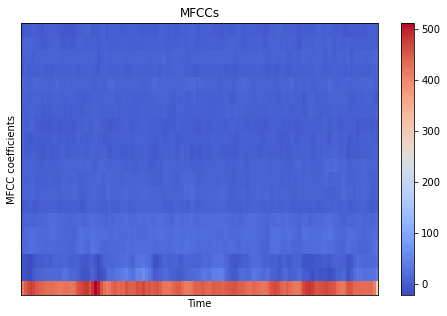

In [19]:
MFCCs = librosa.feature.mfcc(wave, n_mfcc=20)
# display MFCCs
plt.figure(figsize=(8,5))
librosa.display.specshow(MFCCs)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
# show the plot
plt.show()

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_12540/1514688904.py:1: FutureWarning: Pass y=[-4.3455305  9.688747  28.811102  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rb_chroma = librosa.feature.chroma_stft(wave)


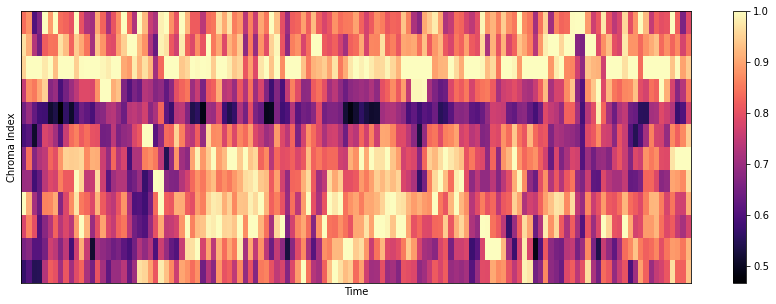

In [7]:
rb_chroma = librosa.feature.chroma_stft(wave)

plt.figure(figsize=(15,5))
librosa.display.specshow(rb_chroma)
plt.xlabel("Time")
plt.ylabel("Chroma Index")
plt.colorbar()
plt.show()